In [2]:
## 반기별 뉴중분류 갯수

import pandas as pd
ppcd_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/ppcd_df.csv',encoding='cp949',index_col=0)
ppcd_df

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,제휴사,영수증번호,소분류코드,고객번호,구매일자,구매시간,구매금액,소분류명,대분류명,뉴중분류명,성별,연령대,거주지역
0,B,8664000,B150401,17218,20140222,20,2420,사이다,식품,음료,F,50대,100
1,B,8664000,B160101,17218,20140222,20,1070,병소주,식품,주류,F,50대,100
2,B,8664000,B160201,17218,20140222,20,8060,국산맥주,식품,주류,F,50대,100
3,B,8664000,B180301,17218,20140222,20,6000,생리대,생활/건강,여성용품,F,50대,100
4,B,8664001,B050901,17674,20140222,22,1120,친환경쌈채소,식품,농산품,F,30대,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7693179,B150101,8397,20140129,22,760,생수,식품,음료,M,30대,100
28593026,B,7693180,B480202,15386,20140129,22,3540,NB 돼지고기,식품,육류,F,50대,100
28593027,B,7693181,B160402,9835,20140129,22,2490,막걸리,식품,음료,F,30대,100
28593028,B,7693181,B580102,9835,20140129,22,8000,냉장족발,식품,육류,F,30대,100


In [3]:
ppcd_df2 = ppcd_df.copy()

In [4]:
ppcd_df_time = ppcd_df2[['고객번호','구매일자','뉴중분류명']]

In [5]:
time_1 = ppcd_df_time[(ppcd_df_time['구매일자']>=20140101)&(ppcd_df_time['구매일자']<=20140630)]
time_2 = ppcd_df_time[(ppcd_df_time['구매일자']>=20140701)&(ppcd_df_time['구매일자']<=20141231)]
time_3 = ppcd_df_time[(ppcd_df_time['구매일자']>=20150101)&(ppcd_df_time['구매일자']<=20150630)]
time_4 = ppcd_df_time[(ppcd_df_time['구매일자']>=20150701)&(ppcd_df_time['구매일자']<=20151231)]

In [6]:
time_1_sort = time_1[['고객번호','뉴중분류명']]
time_2_sort = time_2[['고객번호','뉴중분류명']]
time_3_sort = time_3[['고객번호','뉴중분류명']]
time_4_sort = time_4[['고객번호','뉴중분류명']]

In [7]:
time_1_sort.drop_duplicates(inplace=True)
time_2_sort.drop_duplicates(inplace=True)
time_3_sort.drop_duplicates(inplace=True)
time_4_sort.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [10]:
time_1_count = time_1_sort.groupby(['고객번호'])['뉴중분류명'].agg(**{
    '1_중분류갯수':lambda x:round(x.count())
}).reset_index()

time_2_count = time_2_sort.groupby(['고객번호'])['뉴중분류명'].agg(**{
    '2_중분류갯수':lambda x:round(x.count())
}).reset_index()

time_3_count = time_3_sort.groupby(['고객번호'])['뉴중분류명'].agg(**{
    '3_중분류갯수':lambda x:round(x.count())
}).reset_index()

time_4_count = time_4_sort.groupby(['고객번호'])['뉴중분류명'].agg(**{
    '4_중분류갯수':lambda x:round(x.count())
}).reset_index()

In [11]:
time_1_count

,고객번호,1_중분류갯수
0,1,21
1,2,19
2,3,21
3,4,24
4,5,18
...,...,...
19205,19356,13
19206,19357,9
19207,19359,7
19208,19360,11


In [12]:
p = pd.merge(time_1_count,time_2_count, on='고객번호', how='outer')
p = pd.merge(p,time_3_count, on='고객번호', how='outer')
p = pd.merge(p,time_4_count, on='고객번호', how='outer')
p

,고객번호,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수
0,1,21.0,34.0,29.0,23.0
1,2,19.0,23.0,26.0,21.0
2,3,21.0,22.0,16.0,23.0
3,4,24.0,29.0,27.0,24.0
4,5,18.0,14.0,12.0,13.0
...,...,...,...,...,...
19378,19209,NaN,NaN,NaN,1.0
19379,19215,NaN,NaN,NaN,13.0
19380,19231,NaN,NaN,NaN,14.0
19381,19234,NaN,NaN,NaN,20.0


In [14]:
p.dropna(inplace=True)

In [15]:
p

,고객번호,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수
0,1,21.0,34.0,29.0,23.0
1,2,19.0,23.0,26.0,21.0
2,3,21.0,22.0,16.0,23.0
3,4,24.0,29.0,27.0,24.0
4,5,18.0,14.0,12.0,13.0
...,...,...,...,...,...
19205,19356,13.0,28.0,27.0,27.0
19206,19357,9.0,37.0,34.0,32.0
19207,19359,7.0,23.0,22.0,19.0
19208,19360,11.0,25.0,21.0,16.0


In [16]:
p['1_중분류갯수']= p['1_중분류갯수'].astype('int')
p['2_중분류갯수']= p['2_중분류갯수'].astype('int')
p['3_중분류갯수']= p['3_중분류갯수'].astype('int')
p['4_중분류갯수']= p['4_중분류갯수'].astype('int')

In [21]:
p.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/new_sort.csv')

In [35]:
import pandas as pd
p =pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/new_sort.csv', index_col=0)
p

,고객번호,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수
0,1,21,34,29,23
1,2,19,23,26,21
2,3,21,22,16,23
3,4,24,29,27,24
4,5,18,14,12,13
...,...,...,...,...,...
19205,19356,13,28,27,27
19206,19357,9,37,34,32
19207,19359,7,23,22,19
19208,19360,11,25,21,16


In [37]:
p['1P_sort_de']=p['2_중분류갯수']-p['1_중분류갯수']
p['2P_sort_de']=p['3_중분류갯수']-p['2_중분류갯수']
p['3P_sort_de']=p['4_중분류갯수']-p['3_중분류갯수']

In [38]:
p

,고객번호,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
0,1,21,34,29,23,13,-5,-6
1,2,19,23,26,21,4,3,-5
2,3,21,22,16,23,1,-6,7
3,4,24,29,27,24,5,-2,-3
4,5,18,14,12,13,-4,-2,1
...,...,...,...,...,...,...,...,...
19205,19356,13,28,27,27,15,-1,0
19206,19357,9,37,34,32,28,-3,-2
19207,19359,7,23,22,19,16,-1,-3
19208,19360,11,25,21,16,14,-4,-5


In [33]:
e = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006_2.csv',index_col=0)
e

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat
0,1,M,60대,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,NaN,33340300.0,376140.0,399872.0,NaN,17382750.0,208136.0,307479.0,NaN,12800890.0,184900.0,116728.0,NaN,14,15,14,15,아침형,아침형,아침형,아침형
1,2,M,60대,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,NaN,NaN,21875650.0,46450.0,NaN,NaN,27486650.0,132500.0,NaN,172460.0,25799820.0,NaN,NaN,44000.0,14,14,14,14,아침형,아침형,아침형,아침형
2,3,M,60대,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,NaN,771215.0,NaN,NaN,6960.0,1035594.0,NaN,NaN,NaN,592280.0,NaN,NaN,NaN,679118.0,NaN,12,12,13,13,아침형,아침형,아침형,아침형
3,4,F,60대,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,NaN,3711520.0,420740.0,125250.0,NaN,3170780.0,333864.0,152293.0,NaN,2764050.0,759402.0,213805.0,NaN,14,14,14,14,아침형,아침형,아침형,아침형
4,5,M,60대,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,NaN,NaN,2225730.0,NaN,NaN,NaN,2917380.0,NaN,NaN,17550.0,2586960.0,NaN,NaN,29300.0,15,15,15,14,아침형,아침형,아침형,아침형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,170160,1536090,2104968,2434587,8.027327,0.370342,0.156591,NaN,NaN,170160.0,NaN,29000.0,17200.0,1489890.0,NaN,NaN,NaN,2104968.0,NaN,211900.0,NaN,2222687.0,NaN,16,16,16,14,아침형,아침형,아침형,아침형
19143,19357,F,40대,91950,3281346,3044944,2246675,34.686199,-0.072044,-0.262162,52700.0,39250.0,NaN,NaN,1052250.0,2223486.0,5610.0,NaN,823900.0,2206144.0,14900.0,NaN,344000.0,1902675.0,NaN,NaN,17,18,18,17,저녁형,저녁형,저녁형,저녁형
19144,19359,M,50대,43190,1286327,837240,1092380,28.782982,-0.349124,0.304739,NaN,NaN,43190.0,NaN,NaN,NaN,1286327.0,NaN,NaN,4450.0,832790.0,NaN,NaN,NaN,1092380.0,NaN,16,15,16,17,아침형,아침형,아침형,저녁형
19145,19360,F,40대,368050,2060040,1412140,886060,4.597174,-0.314508,-0.372541,NaN,NaN,NaN,368050.0,10300.0,58610.0,NaN,1991130.0,290100.0,NaN,NaN,1122040.0,334600.0,NaN,NaN,551460.0,20,18,18,17,저녁형,저녁형,저녁형,저녁형


In [39]:
win = pd.merge(e,p,on='고객번호',how='left')
win

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
0,1,M,60대,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,NaN,33340300.0,376140.0,399872.0,NaN,17382750.0,208136.0,307479.0,NaN,12800890.0,184900.0,116728.0,NaN,14,15,14,15,아침형,아침형,아침형,아침형,21,34,29,23,13,-5,-6
1,2,M,60대,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,NaN,NaN,21875650.0,46450.0,NaN,NaN,27486650.0,132500.0,NaN,172460.0,25799820.0,NaN,NaN,44000.0,14,14,14,14,아침형,아침형,아침형,아침형,19,23,26,21,4,3,-5
2,3,M,60대,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,NaN,771215.0,NaN,NaN,6960.0,1035594.0,NaN,NaN,NaN,592280.0,NaN,NaN,NaN,679118.0,NaN,12,12,13,13,아침형,아침형,아침형,아침형,21,22,16,23,1,-6,7
3,4,F,60대,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,NaN,3711520.0,420740.0,125250.0,NaN,3170780.0,333864.0,152293.0,NaN,2764050.0,759402.0,213805.0,NaN,14,14,14,14,아침형,아침형,아침형,아침형,24,29,27,24,5,-2,-3
4,5,M,60대,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,NaN,NaN,2225730.0,NaN,NaN,NaN,2917380.0,NaN,NaN,17550.0,2586960.0,NaN,NaN,29300.0,15,15,15,14,아침형,아침형,아침형,아침형,18,14,12,13,-4,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,170160,1536090,2104968,2434587,8.027327,0.370342,0.156591,NaN,NaN,170160.0,NaN,29000.0,17200.0,1489890.0,NaN,NaN,NaN,2104968.0,NaN,211900.0,NaN,2222687.0,NaN,16,16,16,14,아침형,아침형,아침형,아침형,13,28,27,27,15,-1,0
19143,19357,F,40대,91950,3281346,3044944,2246675,34.686199,-0.072044,-0.262162,52700.0,39250.0,NaN,NaN,1052250.0,2223486.0,5610.0,NaN,823900.0,2206144.0,14900.0,NaN,344000.0,1902675.0,NaN,NaN,17,18,18,17,저녁형,저녁형,저녁형,저녁형,9,37,34,32,28,-3,-2
19144,19359,M,50대,43190,1286327,837240,1092380,28.782982,-0.349124,0.304739,NaN,NaN,43190.0,NaN,NaN,NaN,1286327.0,NaN,NaN,4450.0,832790.0,NaN,NaN,NaN,1092380.0,NaN,16,15,16,17,아침형,아침형,아침형,저녁형,7,23,22,19,16,-1,-3
19145,19360,F,40대,368050,2060040,1412140,886060,4.597174,-0.314508,-0.372541,NaN,NaN,NaN,368050.0,10300.0,58610.0,NaN,1991130.0,290100.0,NaN,NaN,1122040.0,334600.0,NaN,NaN,551460.0,20,18,18,17,저녁형,저녁형,저녁형,저녁형,11,25,21,16,14,-4,-5


In [40]:
win2 = win.copy()
win3 = win2[['1P','2P','3P','1P_sort_de','2P_sort_de','3P_sort_de']]

In [41]:
win3.corr()

,1P,2P,3P,1P_sort_de,2P_sort_de,3P_sort_de
1P,1.000000,-0.002722,-0.000409,0.143757,0.016167,-0.010168
2P,-0.002722,1.000000,-0.011348,-0.061723,0.168420,-0.009394
3P,-0.000409,-0.011348,1.000000,0.003276,-0.046969,0.078915
1P_sort_de,0.143757,-0.061723,0.003276,1.000000,-0.296075,-0.036034
2P_sort_de,0.016167,0.168420,-0.046969,-0.296075,1.000000,-0.294312
3P_sort_de,-0.010168,-0.009394,0.078915,-0.036034,-0.294312,1.000000


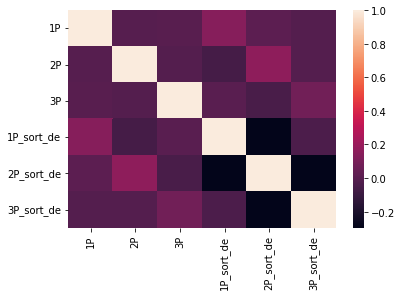

In [42]:
import seaborn as sns
sns.heatmap(win3.corr())

In [43]:
win.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006_3.csv')

In [3]:
import pandas as pd
win = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006_3.csv',index_col=0)
win

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,1P_sort_de,2P_sort_de,3P_sort_de
0,1,M,60대,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,NaN,33340300.0,376140.0,399872.0,NaN,17382750.0,208136.0,307479.0,NaN,12800890.0,184900.0,116728.0,NaN,14,15,14,15,아침형,아침형,아침형,아침형,21,34,29,23,13,-5,-6
1,2,M,60대,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,NaN,NaN,21875650.0,46450.0,NaN,NaN,27486650.0,132500.0,NaN,172460.0,25799820.0,NaN,NaN,44000.0,14,14,14,14,아침형,아침형,아침형,아침형,19,23,26,21,4,3,-5
2,3,M,60대,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,NaN,771215.0,NaN,NaN,6960.0,1035594.0,NaN,NaN,NaN,592280.0,NaN,NaN,NaN,679118.0,NaN,12,12,13,13,아침형,아침형,아침형,아침형,21,22,16,23,1,-6,7
3,4,F,60대,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,NaN,3711520.0,420740.0,125250.0,NaN,3170780.0,333864.0,152293.0,NaN,2764050.0,759402.0,213805.0,NaN,14,14,14,14,아침형,아침형,아침형,아침형,24,29,27,24,5,-2,-3
4,5,M,60대,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,NaN,NaN,2225730.0,NaN,NaN,NaN,2917380.0,NaN,NaN,17550.0,2586960.0,NaN,NaN,29300.0,15,15,15,14,아침형,아침형,아침형,아침형,18,14,12,13,-4,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,170160,1536090,2104968,2434587,8.027327,0.370342,0.156591,NaN,NaN,170160.0,NaN,29000.0,17200.0,1489890.0,NaN,NaN,NaN,2104968.0,NaN,211900.0,NaN,2222687.0,NaN,16,16,16,14,아침형,아침형,아침형,아침형,13,28,27,27,15,-1,0
19143,19357,F,40대,91950,3281346,3044944,2246675,34.686199,-0.072044,-0.262162,52700.0,39250.0,NaN,NaN,1052250.0,2223486.0,5610.0,NaN,823900.0,2206144.0,14900.0,NaN,344000.0,1902675.0,NaN,NaN,17,18,18,17,저녁형,저녁형,저녁형,저녁형,9,37,34,32,28,-3,-2
19144,19359,M,50대,43190,1286327,837240,1092380,28.782982,-0.349124,0.304739,NaN,NaN,43190.0,NaN,NaN,NaN,1286327.0,NaN,NaN,4450.0,832790.0,NaN,NaN,NaN,1092380.0,NaN,16,15,16,17,아침형,아침형,아침형,저녁형,7,23,22,19,16,-1,-3
19145,19360,F,40대,368050,2060040,1412140,886060,4.597174,-0.314508,-0.372541,NaN,NaN,NaN,368050.0,10300.0,58610.0,NaN,1991130.0,290100.0,NaN,NaN,1122040.0,334600.0,NaN,NaN,551460.0,20,18,18,17,저녁형,저녁형,저녁형,저녁형,11,25,21,16,14,-4,-5
